# Who Wants Shots? Seasonal Edition
<center> <img src="./Images/myriam-zilles-Ep941iDLwhk-unsplash.jpg" alt="Sick Stuffy" width="800"/> </center>
<center> Photo by <a href="https://unsplash.com/@myriamzilles?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Myriam Zilles</a> on <a href="https://unsplash.com/collections/IUPhDJeZav4/flu-vaccination-social?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a> </center>
  
### Not that kind! 


Utilizing data courtesy of the United States National Center for Health Statistics, I hope to be able to predict whether or not a given citizen will choose to be vaccinated based on existing patterns from past survey results. 

Stakeholder: Small research firm on behalf of the Office of Infectious Diseases (subdivision of the US Department of Health and Human Services).

Business Problem: Guiding public health efforts with regard to vaccination status based on underlying patterns in the opinions, backgrounds, educations and other factors in the general population. 

##### Target Variable - Seasonal Flu Vaccine 

##### Target Metric(s) - Accuracy Percentage, AUC, Precision - Precision is targeted as in this scenario, a False Positive would be worse than a False Negative.
    * False Positive -> Precision Score -> Predicts Vaccinated, Citizen was Un-vaccinated. 
    * False Negative -> Recall Score -> Predicts Un-vaccinated, Citizen was vaccinated. 

##### Null Hypothesis: Predicting if a citizen will get vaccinated based on behaviors and underlying patterns from survey data will be no more accurate than a 50/50 guess. (H0 accuracy = 50%)

##### Alt Hypothesis: Predicting if a citizen will get vaccinated based on behaviors and underlying patterns from survey data will exceed accuracy of random guessing. (HA accuracy > 50%)


AUC Score Breakdown:

0.5 = No discrimination 

0.5-0.7 = Poor discrimination

0.7-0.8 = Acceptable discrimination

0.8-0.9= Excellent discrimination

Greater than 0.9 = Outstanding discrimination


## Data Understanding
Here we have a dataset provided by the US National Center for Health Statistics. The merged dataframe consists of 26,707 survey responses to 37 questions. Some questions were not answered by the respondents. 

Columns represent the questions asked in the survey, while rows represent the survey respondents. 

Survey questions/column headers are as follows:
 * respondent_id - Number assigned to survey respondent
 * h1n1_concern - Level of concern about the H1N1 flu. (Omitted from this Flu predictive analysis)
     * Ranked from 0 (not at all concerned) to 3 (very concerned).
 * h1n1_knowledge - Level of knowledge about H1N1 flu. (Omitted from this Flu predictive analysis)
     * Ranked from 0 (no knowledge) to 2 (a lot of knowledge).
 * behavioral_antiviral_meds - Has respondent taken antiviral medication? Yes/No (binary)
 * behavioral_avoidance - Has respondent avoided close contact with others with flu-like symptoms? Yes/No (binary)
 * behavioral_face_mask - Has respondent bought a face mask? Yes/No (binary)
 * behavioral_wash_hands - Has respondent frequently washed hands or used hand sanitizer? Yes/No (binary)
 * behavioral_large_gatherings - Has respondent reduced time at large gatherings? Yes/No (binary)
 * behavioral_outside_home - Has respondent reduced contact with people outside of own household? Yes/No (binary)
 * behavioral_touch_face - Has respondent avoided touching face(including eyes, nose, mouth, etc)? Yes/No (binary)
 * doctor_recc_h1n1 - Was H1N1 flu vaccine recommended by doctor? Yes/No (binary) (Omitted from this Flu predictive analysis)
 * doctor_recc_seasonal - Was Seasonal flu vaccine recommended by doctor? Yes/No (binary)
 * chronic_med_condition - Does respondent have chronic medical condition? Yes/No (binary) Conditions include: asthma or other lung condition, diabetes, heart condition, kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. 
 * child_under_6_months - Does respondent have regular close contact with a child under the age of six months? Yes/No (binary)
 * health_worker - Is respondent a healthcare worker? Yes/No (binary)
 * health_insurance - Does respondent have health insurance? Yes/No (binary)
 * opinion_h1n1_vacc_effective - Respondent's personal opinion about H1N1 vaccine effectiveness (Omitted from this Flu predictive analysis)
     * Ranked from 1 (not at all effective) to 5 (very effective).
 * opinion_h1n1_risk - Respondent's personal opinion about risk of getting sick with H1N1 flu without vaccine  (Omitted from this Flu predictive analysis)
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine (Omitted from this Flu predictive analysis)
     * Ranked from 1 (not at all worried) to 5 (very worried)
 * opinion_seas_vacc_effective - Respondent's personal opinion about seasonal flu vaccine effectiveness 
     * Ranked from 1 (not at all effective) to 5 (very effective)
 * opinion_seas_risk - Respondent's personal opinion about risk of getting sick with seasonal flu without vaccine 
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine 
     * Ranked from 1 (not at all worried) to 5 (very worried).
 * age_group - Age group of respondent - Ranges are 18-34, 35-44, 45-54, 55-64, and 65+ Years.
 * education - Self-reported education level. Less than 12 years, 12 years, Some College, or College Graduate.
 * race - Race of respondent. White, Black, Hispanic, and Other/Multiple.
 * sex - Sex of respondent. Male or Female 
 * income_poverty - Respondent annual household income with respect to 2008 Census poverty thresholds.
     * "Below Poverty", "<= \\$75,000 Above Poverty" , or "> \\$75,000"
 * marital_status - Marital status of respondent.
     * Married or Not Married
 * rent_or_own - Housing situation of respondent.
     * Rent or Own
 * employment_status - Employment status of respondent.
     * Employed, Not in Labor Force, or Unemployed
 * hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
 * census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
 * household_adults - Number of OTHER adults in household, responses range 0 through 3.
 * household_children - Number of children in household, responses range 0 to 3.
 * employment_industry - Industry respondent is employed in. Values are represented as random, encoded character strings.
 * employment_occupation - Occupation of respondent. Values are represented as random, encoded character strings.
 * h1n1_vaccine - Target Variable for H1N1 predictive analysis (Omitted from this Flu predictive analysis)
 * seasonal_vaccine - Target Variable for seasonal flu predictive analysis

In [210]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [211]:
labels = pd.read_csv('Data/training_set_labels.csv')
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [212]:
features = pd.read_csv('Data/training_set_features.csv')
features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [213]:
df = pd.merge(features,labels, on='respondent_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Data Analysis
Through EDA, I discovered there are several object columns that will need to be One Hot Encoded in order to be modeled, including age_group, education, race, sec, marital_status, and employment_industry and occupation, among others. These could turn out to be important features, so I will encode so as to maintain as many features as possible for modeling.

Many columns have many missing values. Survey respondents clearly did not answer every question, which I would expect. After evaluation and modeling with the H1N1 set in my H1N1 notebook, I opted to drop the null values from this seasonal flu dataframe. The balance of classes is much closer in the seasonal vaccine target, which intuitively makes sense. The seasonal flu is, as it's nomenclature would suggest, "seasonal" and annually reoccuring. Even after dropping the null values, total counts still exceed 6400 complete survey responses, which I deem to be an adequate count for modeling at this stage. 

In [214]:
df.dropna(inplace=True)
df.seasonal_vaccine.value_counts()

0    3491
1    2946
Name: seasonal_vaccine, dtype: int64

In [215]:
#drop h1n1 columns from seasonal flu df
flu_df = df.drop(columns=['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1', 
                'opinion_h1n1_vacc_effective','opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'],
                axis=1)
flu_df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
7,7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1
10,10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1
11,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1
15,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0


In [216]:
#set index to respondent_id. ID is irrelevant to modeling and could throw off the scale 
#being a large float value compared to all categorical/binary values
flu_df.set_index(keys='respondent_id', inplace=True)
flu_df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1
15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0


In [357]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6437 entries, 1 to 26703
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    6437 non-null   float64
 1   behavioral_avoidance         6437 non-null   float64
 2   behavioral_face_mask         6437 non-null   float64
 3   behavioral_wash_hands        6437 non-null   float64
 4   behavioral_large_gatherings  6437 non-null   float64
 5   behavioral_outside_home      6437 non-null   float64
 6   behavioral_touch_face        6437 non-null   float64
 7   doctor_recc_seasonal         6437 non-null   float64
 8   chronic_med_condition        6437 non-null   float64
 9   child_under_6_months         6437 non-null   float64
 10  health_worker                6437 non-null   float64
 11  health_insurance             6437 non-null   float64
 12  opinion_seas_vacc_effective  6437 non-null   float64
 13  opinion_seas_risk

In [217]:
#checking class distribution
flu_df.seasonal_vaccine.value_counts(normalize=True)

0    0.542333
1    0.457667
Name: seasonal_vaccine, dtype: float64

In [218]:
#Confirm there are no null values
flu_df.isna().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
seasonal_vaccine               0
dtype: int

In [219]:
#train-test split - opted for a 75/25 split and a random state for reproducability
y = flu_df['seasonal_vaccine']
X = flu_df.drop('seasonal_vaccine', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

In [220]:
#encode train set
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_clean = ohe.fit_transform(X_train)
X_train_clean.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,employment_occupation_qxajmpny,employment_occupation_kldqjyjy,employment_occupation_rcertsgn,employment_occupation_haliazsg,employment_occupation_bxpfxfdn,employment_occupation_dlvbwzss,employment_occupation_tfqavkke,employment_occupation_ccgxvspp,employment_occupation_pvmttkik,employment_occupation_ukymxvdu
respondent_id,,,,,,,,,,,,,,,,,,,,,
887,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
11985,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
25980,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20493,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
#encode test set
X_test_clean = ohe.transform(X_test)
X_test_clean.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,employment_occupation_qxajmpny,employment_occupation_kldqjyjy,employment_occupation_rcertsgn,employment_occupation_haliazsg,employment_occupation_bxpfxfdn,employment_occupation_dlvbwzss,employment_occupation_tfqavkke,employment_occupation_ccgxvspp,employment_occupation_pvmttkik,employment_occupation_ukymxvdu
respondent_id,,,,,,,,,,,,,,,,,,,,,
2316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
13814,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24918,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
16444,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
22394,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
y_train.value_counts(normalize=True)

0    0.538637
1    0.461363
Name: seasonal_vaccine, dtype: float64

## Modeling

### Logistic Regression

The first model I wanted to try was logistic regression. I started with a base model and no tuning, with a cross validation of 5 folds. Mean cross-validation score was 79% and violin plot shows a bit of variance in the score distribution. Opted to run a GridSearchCV to fine tune the hyperparameters. GridSearch deemed optimal parameters to be {'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'} and upon applying these hyperparameters, saw little improvement in the score percentage. Variation decreased drastically on the violin plot visualization. 

Scores of the GridSearch tuned LogisticRegression model:

Accuracy: 0.7906832298136646

Precision: 0.7720797720797721

Recall: 0.7538247566063978

F1 Score: 0.7628430682617875

AUC: 0.86

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [224]:
lr_base = LogisticRegression(random_state=15)
lr_base.fit(X_train_clean, y_train)

LogisticRegression(random_state=15)

In [359]:
cv_lr = cross_val_score(lr_base, X_train_clean, y_train, cv=5)
cv_lr

array([0.78571429, 0.78778468, 0.79585492, 0.79689119, 0.79896373])

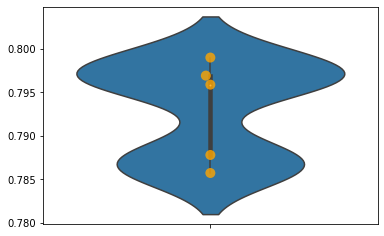

In [336]:
sns.violinplot(y=cv_lr, bw=.4)
sns.swarmplot(y=cv_lr, color='orange', size=10, alpha=0.8);

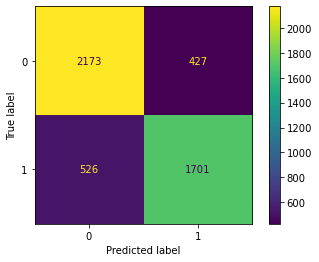

In [226]:
plot_confusion_matrix(lr_base, X_train_clean, y_train)

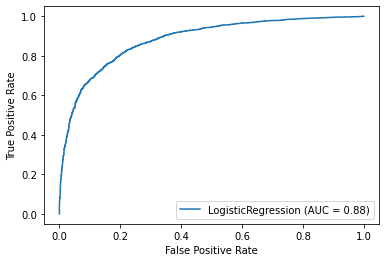

In [227]:
plot_roc_curve(lr_base, X_train_clean, y_train)

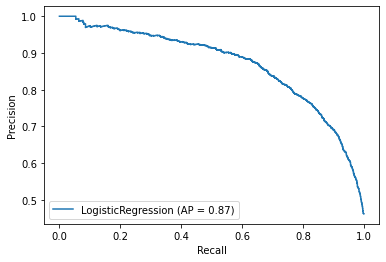

In [228]:
plot_precision_recall_curve(lr_base, X_train_clean, y_train)

In [329]:
lr_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'penalty': ['l1', 'l2', 'elasticnet', None],
           'max_iter': [100, 200, 500]
    
}

In [330]:
lr_gscv = GridSearchCV(lr_base, lr_grid, cv=5)

In [331]:
lr_gscv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=15),
             param_grid={'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [332]:
lr_gscv.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [333]:
lr_gscv.best_score_

0.7934560550960642

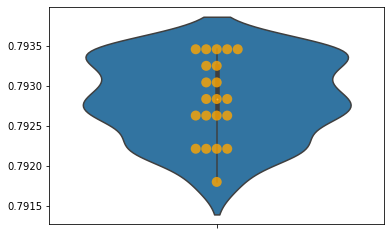

In [334]:
sns.violinplot(y=lr_gscv.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=lr_gscv.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

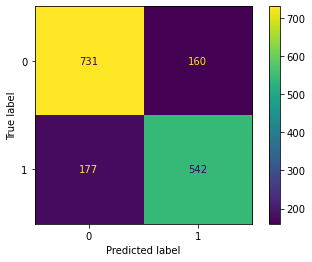

In [353]:
plot_confusion_matrix(lr_gscv, X_test_clean, y_test)

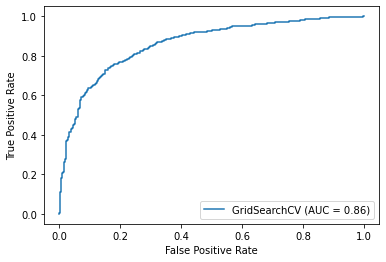

In [354]:
plot_roc_curve(lr_gscv, X_test_clean, y_test)

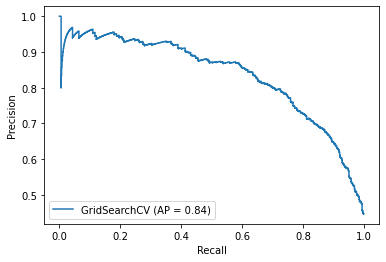

In [355]:
plot_precision_recall_curve(lr_gscv, X_test_clean, y_test)

In [356]:
lr_gscv_predicts = lr_gscv.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, lr_gscv_predicts))
print('Precision:', precision_score(y_test, lr_gscv_predicts))
print('Recall:', recall_score(y_test, lr_gscv_predicts))
print('F1 Score:', f1_score(y_test, lr_gscv_predicts))

Accuracy: 0.7906832298136646
Precision: 0.7720797720797721
Recall: 0.7538247566063978
F1 Score: 0.7628430682617875


### Decision Trees

Decision Trees were the next model for attempt. Base untuned model, as expected, fit the training data perfectly, but upon cross-validation with 5 folds returned a mean score of 70%. Similar to the Logistic Regression, I ran a GridSearch to find optimal tuning parameters. With the grid search returning a mean cross-val score still at 76%, I opted to move on to RandomForests to increase variability in my trees and hopefully return better scores.

In [229]:
dt_base = DecisionTreeClassifier(random_state=15)
dt_base.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=15)

In [364]:
dtcv_base = cross_val_score(dt_base, X_train_clean, y_train)
dtcv_base.mean()

0.7029191473841169

In [231]:
dt_base.score(X_train_clean, y_train)

1.0

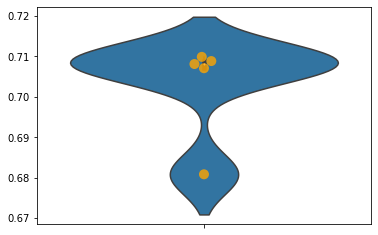

In [232]:
#Swarm plot from FI lecture notebook
sns.violinplot(y=dtcv_base, bw=.4)
sns.swarmplot(y=dtcv_base, color='orange', size=10, alpha=0.8);

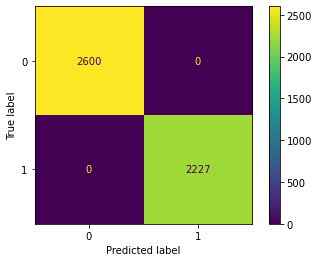

In [233]:
plot_confusion_matrix(dt_base, X_train_clean, y_train)

In [234]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf' : [1, 5, 10, 25]
}

In [235]:
dt_gs = GridSearchCV(dt_base, tree_params, cv=5)

In [236]:
dt_gs.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 5, 10, 25]})

In [237]:
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [238]:
dt_gs.best_score_

0.7594780034113218

### Random Forests

The first RandomForest with no tuning returns a mean cross validated score of 78% - an improvement over the tuned DecisionTree CV score. With the RandomForests, I spent a bit more time with GridSearching to tune the parameters and find what would return the highest score. The best performing model uses the parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}.

RandomForest top performing model scores:

Accuracy: 0.7782608695652173

Precision: 0.7996688741721855

Recall: 0.6717663421418637

F1 Score: 0.7301587301587301

AUC: 0.86

In [108]:
rf_base = RandomForestClassifier(random_state=15)
rf_base.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=15)

In [365]:
rf_cv = cross_val_score(rf_base, X_train_clean, y_train, cv=5)
rf_cv.mean()

0.7841304884197428

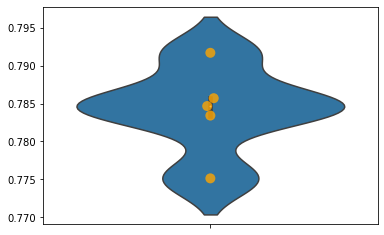

In [111]:
sns.violinplot(y=rf_cv, bw=.4)
sns.swarmplot(y=rf_cv, color='orange', size=10, alpha=0.8);

In [113]:
#Grid search to optimize performance here
rf_tree_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf' : [1, 5, 10, 25]
}

In [114]:
rf_gs = GridSearchCV(rf_base, rf_tree_grid, cv=5)

In [115]:
rf_gs.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 5, 10, 25]})

In [116]:
rf_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [117]:
rf_gs.best_score_

0.7884819618318154

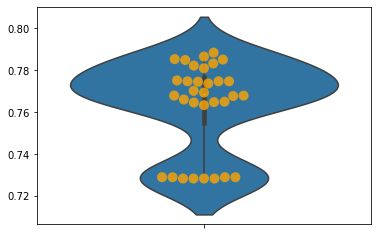

In [373]:
sns.violinplot(y=rf_gs.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=rf_gs.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

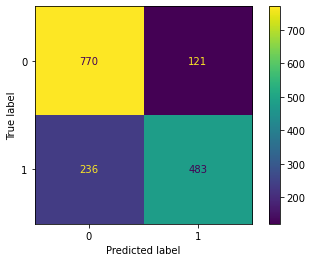

In [369]:
plot_confusion_matrix(rf_gs, X_test_clean, y_test)

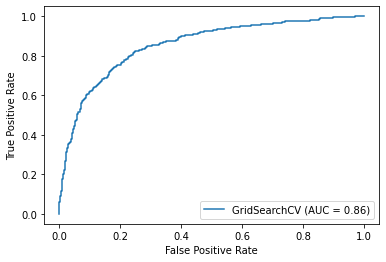

In [370]:
plot_roc_curve(rf_gs, X_test_clean, y_test)

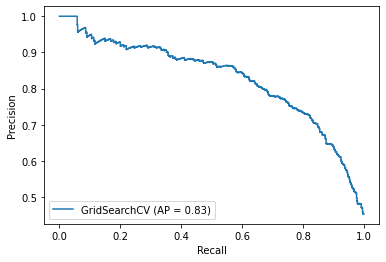

In [371]:
plot_precision_recall_curve(rf_gs, X_test_clean, y_test)

In [372]:
rf_gs_predicts = rf_gs.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, rf_gs_predicts))
print('Precision:', precision_score(y_test, rf_gs_predicts))
print('Recall:', recall_score(y_test, rf_gs_predicts))
print('F1 Score:', f1_score(y_test, rf_gs_predicts))

Accuracy: 0.7782608695652173
Precision: 0.7996688741721855
Recall: 0.6717663421418637
F1 Score: 0.7301587301587301


In [314]:
#Grid search to optimize performance here
rf_2grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf' : [5, 10, 25],
    'max_features': [5, 10, 20]
}

In [315]:
rf2_gscv = GridSearchCV(rf_base, rf_2grid, cv=10)


In [317]:
rf2_gscv.fit(X_train_clean, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 25]})

In [318]:
rf2_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 10}

In [319]:
rf2_gscv.best_score_

0.7899379741071966

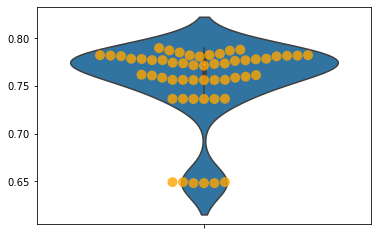

In [320]:
sns.violinplot(y=rf2_gscv.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=rf2_gscv.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

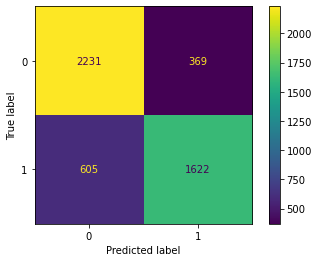

In [345]:
plot_confusion_matrix(rf2_gscv, X_train_clean, y_train)

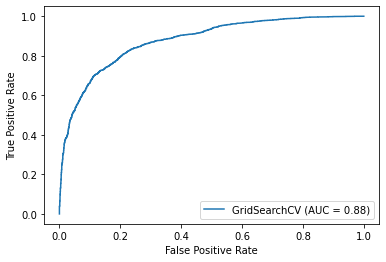

In [346]:
plot_roc_curve(rf2_gscv, X_train_clean, y_train)

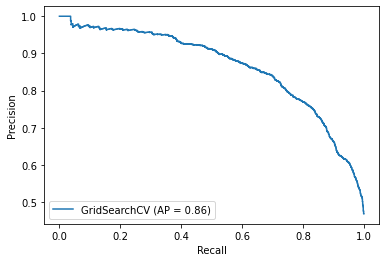

In [347]:
plot_precision_recall_curve(rf2_gscv, X_train_clean, y_train)

In [348]:
rf2_gscv_predicts = rf2_gscv.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, rf2_gscv_predicts))
print('Precision:', precision_score(y_test, rf2_gscv_predicts))
print('Recall:', recall_score(y_test, rf2_gscv_predicts))
print('F1 Score:', f1_score(y_test, rf2_gscv_predicts))

Accuracy: 0.7714285714285715
Precision: 0.7671232876712328
Recall: 0.7009735744089013
F1 Score: 0.7325581395348838


### AdaBoost and GradientBoost

Lsat of the models I attempted are the more advanced models. I ran both as base models and compared them against each other, then ran GridSearches on both for tuning parameters. Top performing models and tuned parameters for each model type are below.

#### AdaBoost:

Base Model
 * Mean cross-validated score 80%
 
Best Performing Model
 * Params {'learning_rate': 0.5, 'n_estimators': 50}
 * Accuracy: 0.7863354037267081
 * Precision: 0.7713458755426917
 * Recall: 0.741307371349096
 * F1 Score: 0.7560283687943263
 * AUC : 0.86
 
#### GradientBoost 

I did spend a lot of time reading through the SKLearn documentation and trying some code. The source is in the code blocks and commented out below - towards the bottom of the notebook. One was utilizing the make_scorer wrapper to enable running multiple scorers within the GridSearch at one time, and then visualizing that output in terms of which hyperparameter to tune to achieve which optimal score designated. In the interest of time, I only sampled one hyperparameter, but it would be worth exploring visualizing multiple hyperparameters against multiple scorers. The second was to look at the deviance in the test set based on adjusting learning rate or the subset sample over boosting iterations. Neither subsequent test adjustment yielded significant model improvement, though it was informative reading and worthy exercises for the future. Could potentially expand further. 

Base Model
 * Mean cross-validated score 79%
 
Best Performing Model
 * Params {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 200}
 * Accuracy: 0.7937888198757764
 * Precision: 0.7776183644189383
 * Recall: 0.7538247566063978
 * F1 Score: 0.7655367231638418
 * AUC : 0.86

In [120]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [121]:
#AdaBoost base for comparison
abc = AdaBoostClassifier(random_state=15)

abc.fit(X_train_clean, y_train)

AdaBoostClassifier(random_state=15)

In [122]:
abc_cv = cross_val_score(abc, X_train_clean, y_train, cv=5)
abc_cv

array([0.80434783, 0.78467909, 0.79585492, 0.80103627, 0.79481865])

In [123]:
abc_cv.mean()

0.7961473519346913

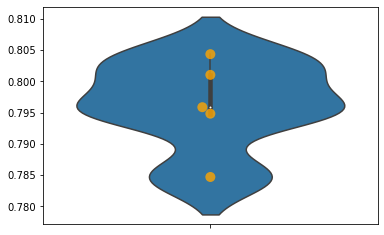

In [129]:
sns.violinplot(y=abc_cv, bw=.4)
sns.swarmplot(y=abc_cv, color='orange', size=10, alpha=0.8);

In [136]:
#GridSearch to try and optimize
ada_grid = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [25, 50, 100]
}

In [137]:
gs_ada = GridSearchCV(abc, ada_grid, cv=5)

In [138]:
gs_ada.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=15),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [25, 50, 100]})

In [139]:
gs_ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [140]:
gs_ada.best_score_

0.8011201579077227

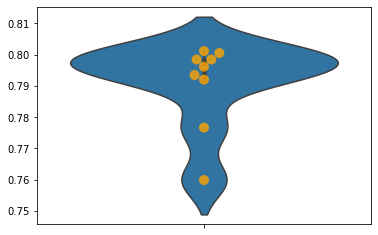

In [142]:
sns.violinplot(y=gs_ada.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=gs_ada.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

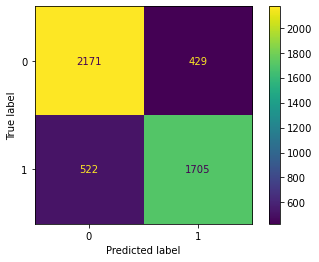

In [143]:
plot_confusion_matrix(gs_ada, X_train_clean, y_train)

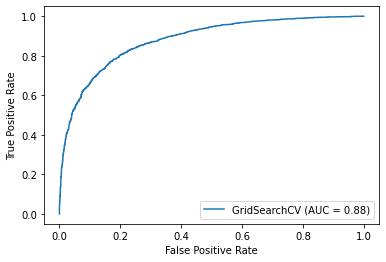

In [144]:
plot_roc_curve(gs_ada, X_train_clean, y_train)

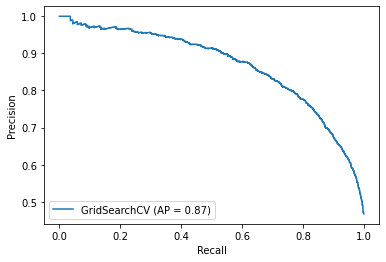

In [145]:
plot_precision_recall_curve(gs_ada, X_train_clean, y_train)

In [147]:
ada_predicts = gs_ada.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, ada_predicts))
print('Precision:', precision_score(y_test, ada_predicts))
print('Recall:', recall_score(y_test, ada_predicts))
print('F1 Score:', f1_score(y_test, ada_predicts))

Accuracy: 0.7863354037267081
Precision: 0.7713458755426917
Recall: 0.741307371349096
F1 Score: 0.7560283687943263


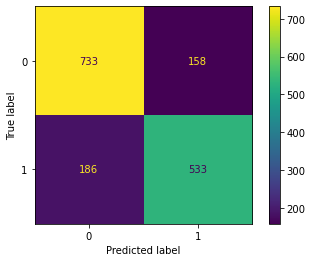

In [148]:
plot_confusion_matrix(gs_ada, X_test_clean, y_test)

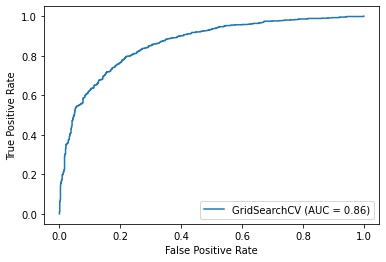

In [374]:
plot_roc_curve(gs_ada, X_test_clean, y_test)

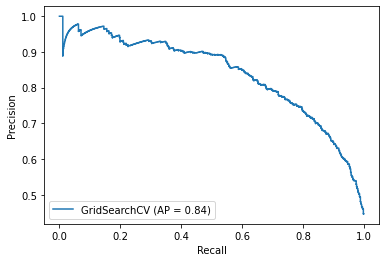

In [149]:
plot_precision_recall_curve(gs_ada, X_test_clean, y_test)

In [163]:
from sklearn.metrics import make_scorer

In [126]:
#GBoost base model to compare 
gbc = GradientBoostingClassifier(random_state=15)

gbc.fit(X_train_clean, y_train)

GradientBoostingClassifier(random_state=15)

In [127]:
#cross validate
gbc_cv = cross_val_score(gbc, X_train_clean, y_train, cv=5)
gbc_cv

array([0.78985507, 0.79192547, 0.79378238, 0.78445596, 0.79792746])

In [128]:
#average training score
gbc_cv.mean()

0.7915892682822172

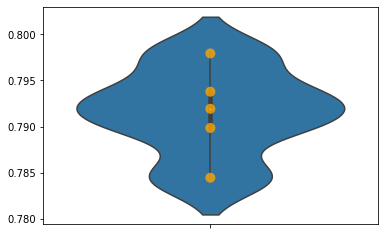

In [130]:
sns.violinplot(y=gbc_cv, bw=.4)
sns.swarmplot(y=gbc_cv, color='orange', size=10, alpha=0.8);

In [150]:
#tune params and add additional folds - perhaps improve score
gbc_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5]
}

In [151]:
gbc2 = GridSearchCV(gbc, gbc_grid, cv=10)

In [152]:
gbc2.fit(X_train_clean, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=15),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]})

In [380]:
gbc2.best_params_

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 200}

In [381]:
gbc2.best_score_

0.799878010016924

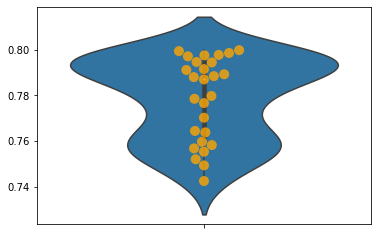

In [155]:
sns.violinplot(y=gbc2.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=gbc2.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

In [375]:
gb_predicts = gbc2.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, gb_predicts))
print('Precision:', precision_score(y_test, gb_predicts))
print('Recall:', recall_score(y_test, gb_predicts))
print('F1 Score:', f1_score(y_test, gb_predicts))

Accuracy: 0.7937888198757764
Precision: 0.7776183644189383
Recall: 0.7538247566063978
F1 Score: 0.7655367231638418


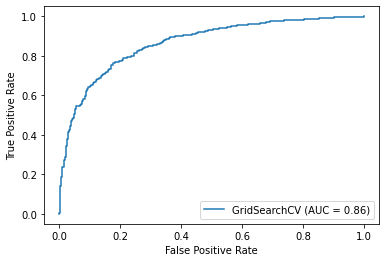

In [376]:
plot_roc_curve(gbc2, X_test_clean, y_test)

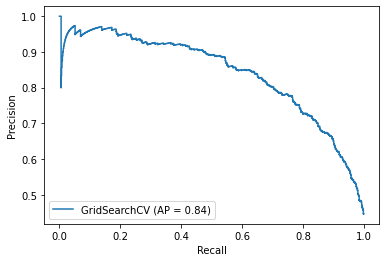

In [377]:
plot_precision_recall_curve(gbc2, X_test_clean, y_test)

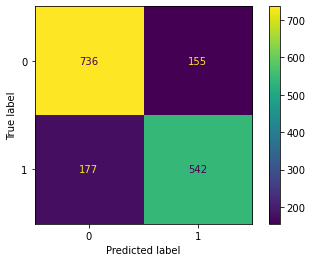

In [378]:
plot_confusion_matrix(gbc2, X_test_clean, y_test)

In [161]:
gbc2.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=200,
                           random_state=15)

In [173]:
#reading documentation on optimizing parameters - including make_scorer wrapper to allow utilization of score 
#functions in GridSearch and refits during to be based on which score param we want
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score), "Precision": make_scorer(precision_score)}

gs3 = GridSearchCV(
    GradientBoostingClassifier(random_state=15),
    param_grid={"min_samples_split": [2, 10, 25]},
    scoring=scoring,
    refit="Precision",
    return_train_score=True,
)

In [174]:
gs3.fit(X_train_clean, y_train)
results = gs3.cv_results_


In [175]:
results

{'mean_fit_time': array([0.97128711, 1.04635234, 0.95234313]),
 'std_fit_time': array([0.08128227, 0.0622322 , 0.11388615]),
 'mean_score_time': array([0.01488676, 0.01778173, 0.01221104]),
 'std_score_time': array([0.00204552, 0.00164144, 0.00057111]),
 'param_min_samples_split': masked_array(data=[2, 10, 25],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2},
  {'min_samples_split': 10},
  {'min_samples_split': 25}],
 'split0_test_AUC': array([0.87280959, 0.87333563, 0.87286564]),
 'split1_test_AUC': array([0.86223267, 0.8637375 , 0.86345291]),
 'split2_test_AUC': array([0.87220182, 0.87153198, 0.87226664]),
 'split3_test_AUC': array([0.87668755, 0.87527442, 0.87752593]),
 'split4_test_AUC': array([0.87493518, 0.87514261, 0.87546672]),
 'mean_test_AUC': array([0.87177336, 0.87180443, 0.87231557]),
 'std_test_AUC': array([0.00502849, 0.0042586 , 0.00481517]),
 'rank_test_AUC': array([3, 2, 1], dtype=int32

In [379]:
gs3_preds = gs3.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, gs3_preds))
print('Precision:', precision_score(y_test, gs3_preds))
print('Recall:', recall_score(y_test, gs3_preds))
print('F1 Score:', f1_score(y_test, gs3_preds))

Accuracy: 0.7881987577639752
Precision: 0.7661971830985915
Recall: 0.7566063977746871
F1 Score: 0.761371588523443


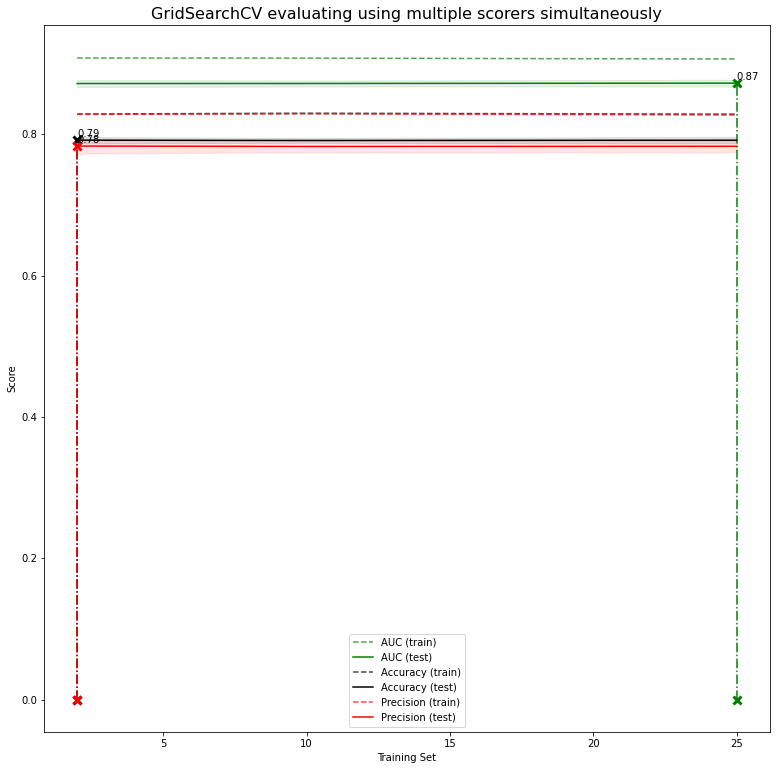

In [179]:
#Code from SKLearn doc https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)
plt.xlabel("Min_samples_split")
plt.ylabel("Score")
ax = plt.gca()
# ax.set_xlim(0, 402)
# ax.set_ylim(0.73, 1)
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [185]:
from sklearn import ensemble

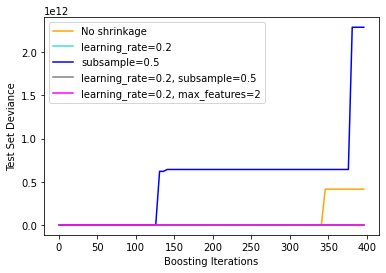

In [187]:
#Code from SKLearn Documentation to look at deviation - maybe provide insight as to learning rate params to tune
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py
gs4_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(gs4_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train_clean, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test_clean)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper left")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

In [206]:
test_grid = {
    'learning_rate': [0.1, 0.2, 0.5],
    'subsample': [0.5, 0.8, 1],
    'max_features': [10, 25, 50, None]
}

In [240]:
gbc_cvtest = GridSearchCV(gbc, test_grid, cv=5)
gbc_cvtest.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=15),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_features': [10, 25, 50, None],
                         'subsample': [0.5, 0.8, 1]})

In [241]:
gbc_cvtest.best_params_

{'learning_rate': 0.1, 'max_features': 10, 'subsample': 0.5}

In [313]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train_clean.columns, gbc.feature_importances_)
}
feat_import = pd.DataFrame(data=feat_import, index=range(len(feat_import)))
feat_import.transpose()
feat_import.drop_duplicates(inplace=True)
feat_import = feat_import.transpose()
feat_import.rename(columns = {0: 'Importance'}, inplace = True)
feat_import.sort_values(by='Importance', ascending=False, inplace=True)
feat_import.head(10)

,Importance
opinion_seas_risk,0.443620
opinion_seas_vacc_effective,0.147650
doctor_recc_seasonal,0.110961
health_insurance,0.038329
health_worker,0.031397
employment_industry_haxffmxo,0.023899
age_group_18 - 34 Years,0.019164
opinion_seas_sick_from_vacc,0.017302
employment_occupation_dcjcmpih,0.012162
rent_or_own_Own,0.011905


In [242]:
gbc_cvtest.best_score_

0.8000834593805983

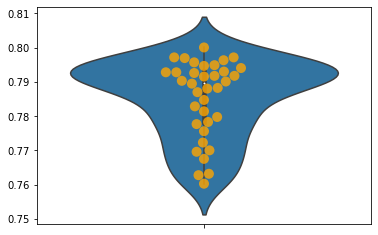

In [243]:
sns.violinplot(y=gbc_cvtest.cv_results_['mean_test_score'], bw=.4)
sns.swarmplot(y=gbc_cvtest.cv_results_['mean_test_score'], color='orange', size=10, alpha=0.8);

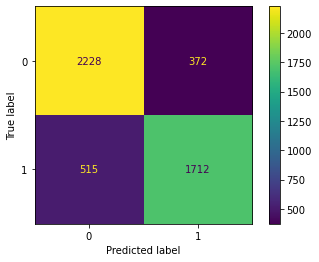

In [244]:
plot_confusion_matrix(gbc_cvtest, X_train_clean, y_train)

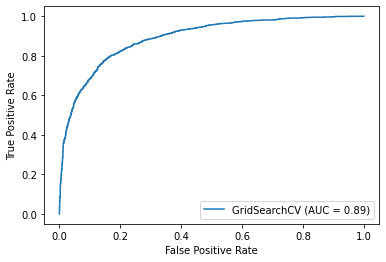

In [245]:
plot_roc_curve(gbc_cvtest, X_train_clean, y_train)

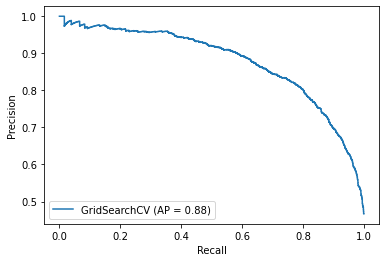

In [246]:
plot_precision_recall_curve(gbc_cvtest, X_train_clean, y_train)

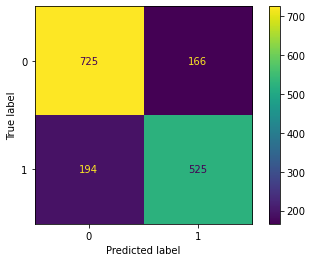

In [247]:
plot_confusion_matrix(gbc_cvtest, X_test_clean, y_test)

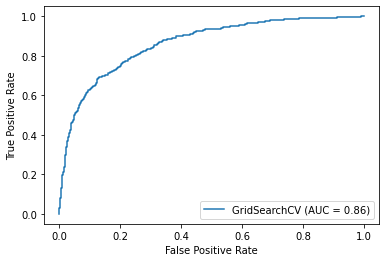

In [249]:
plot_roc_curve(gbc_cvtest, X_test_clean, y_test)

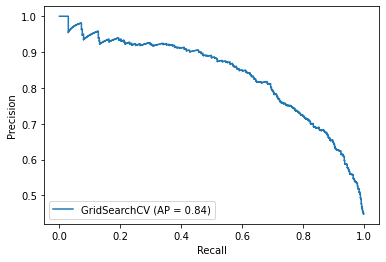

In [250]:
plot_precision_recall_curve(gbc_cvtest, X_test_clean, y_test)

In [338]:
gbcv_predicts = gbc_cvtest.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, gbcv_predicts))
print('Precision:', precision_score(y_test, gbcv_predicts))
print('Recall:', recall_score(y_test, gbcv_predicts))
print('F1 Score:', f1_score(y_test, gbcv_predicts))

Accuracy: 0.7763975155279503
Precision: 0.7597684515195369
Recall: 0.7301808066759388
F1 Score: 0.7446808510638298
